In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable 
from matplotlib.colors import Normalize, LinearSegmentedColormap

In [22]:
# Loading the data
Bole = pd.read_csv('Bole_1960_2020_dTx_cgf.txt', delimiter=r"\s+", header=None, names=["Year", "Month", "Day", "max_temperature"]).iloc[11323:22281]
Navrongo = pd.read_csv('Navrongo_1960_2020_dTx_cgf.txt', delimiter=r"\s+", header=None, names=["Year", "Month", "Day", "max_temperature"]).iloc[11323:22281]
Wa = pd.read_csv('Wa_1960_2020_dTx_cgf.txt', delimiter=r"\s+", header=None, names=["Year", "Month", "Day", "max_temperature"]).iloc[11323:22281]
Walewale = pd.read_csv('Walewale_1960_2020_dTx_cgf.txt', delimiter=r"\s+", header=None, names=["Year", "Month", "Day", "max_temperature"]).iloc[11323:22281]
Yendi = pd.read_csv('Yendi_1960_2020_dTx_cgf.txt', delimiter=r"\s+", header=None, names=["Year", "Month", "Day", "max_temperature"]).iloc[11323:22281]


In [23]:
# 95th percentile for each dataset
Bole_95th_percentile = np.percentile(Bole['max_temperature'], 95)
Navrongo_95th_percentile = np.percentile(Navrongo['max_temperature'], 95)
Wa_95th_percentile = np.percentile(Wa['max_temperature'], 95)
Walewale_95th_percentile = np.percentile(Walewale['max_temperature'], 95)
Yendi_95th_percentile = np.percentile(Yendi['max_temperature'], 95)

print(f"Bole 95th Percentile: {Bole_95th_percentile}")
print(f"Navrongo 95th Percentile: {Navrongo_95th_percentile}")
print(f"Wa 95th Percentile: {Wa_95th_percentile}")
print(f"Walewale 95th Percentile: {Walewale_95th_percentile}")
print(f"Yendi 95th Percentile: {Yendi_95th_percentile}")


Bole 95th Percentile: 38.1
Navrongo 95th Percentile: 41.0
Wa 95th Percentile: 39.0
Walewale 95th Percentile: 40.3
Yendi 95th Percentile: 39.4


In [24]:

# days exceeding the 90th percentile for each station
Bole['above_95th'] = Bole['max_temperature'] > Bole_95th_percentile
Navrongo['above_95th'] = Navrongo['max_temperature'] > Navrongo_95th_percentile
Wa['above_95th'] = Wa['max_temperature'] > Wa_95th_percentile
Walewale['above_95th'] = Walewale['max_temperature'] > Walewale_95th_percentile
Yendi['above_95th'] = Yendi['max_temperature'] > Yendi_95th_percentile

def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df = df.set_index('date')
    df['consecutive'] = df['above_95th'].astype(int).groupby((df['above_95th'] != df['above_95th'].shift()).cumsum()).cumsum()
    return df[(df['consecutive'] >= 3) & df['above_95th']].reset_index()

Bole_consecutive = filter_consecutive_days(Bole)
Navrongo_consecutive = filter_consecutive_days(Navrongo)
Wa_consecutive = filter_consecutive_days(Wa)
Walewale_consecutive = filter_consecutive_days(Walewale)
Yendi_consecutive = filter_consecutive_days(Yendi)

Yendi_consecutive


,date,Year,Month,Day,max_temperature,above_95th,consecutive
0,1993-04-12,1993,4,12,40.60,True,3
1,1993-04-13,1993,4,13,39.50,True,4
2,1994-03-19,1994,3,19,39.60,True,3
3,1994-03-20,1994,3,20,40.30,True,4
4,1994-03-30,1994,3,30,39.50,True,3
...,...,...,...,...,...,...,...
134,2017-04-17,2017,4,17,39.50,True,3
135,2017-04-18,2017,4,18,39.80,True,4
136,2017-04-19,2017,4,19,40.20,True,5
137,2017-04-20,2017,4,20,39.60,True,6


In [25]:
Yendi_consecutive['consecutive'].mean()

5.014388489208633

In [26]:
#Bole_episode_counts

In [27]:
#Bole_consecutive.iloc[25:60]

In [28]:
# Loading the data for each location
locations = ['BOLE', 'NAVRONGO', 'WA', 'WALEWALE', 'YENDI']

# Storing all locations data in a dictionary for easier processing
data = {
    'Bole': Bole,
    'Navrongo': Navrongo,
    'Wa': Wa,
    'Walewale': Walewale,
    'Yendi': Yendi
}

percentiles = {
    'Bole': Bole_95th_percentile,
    'Navrongo': Navrongo_95th_percentile,
    'Wa': Wa_95th_percentile,
    'Walewale': Walewale_95th_percentile,
    'Yendi': Yendi_95th_percentile
}

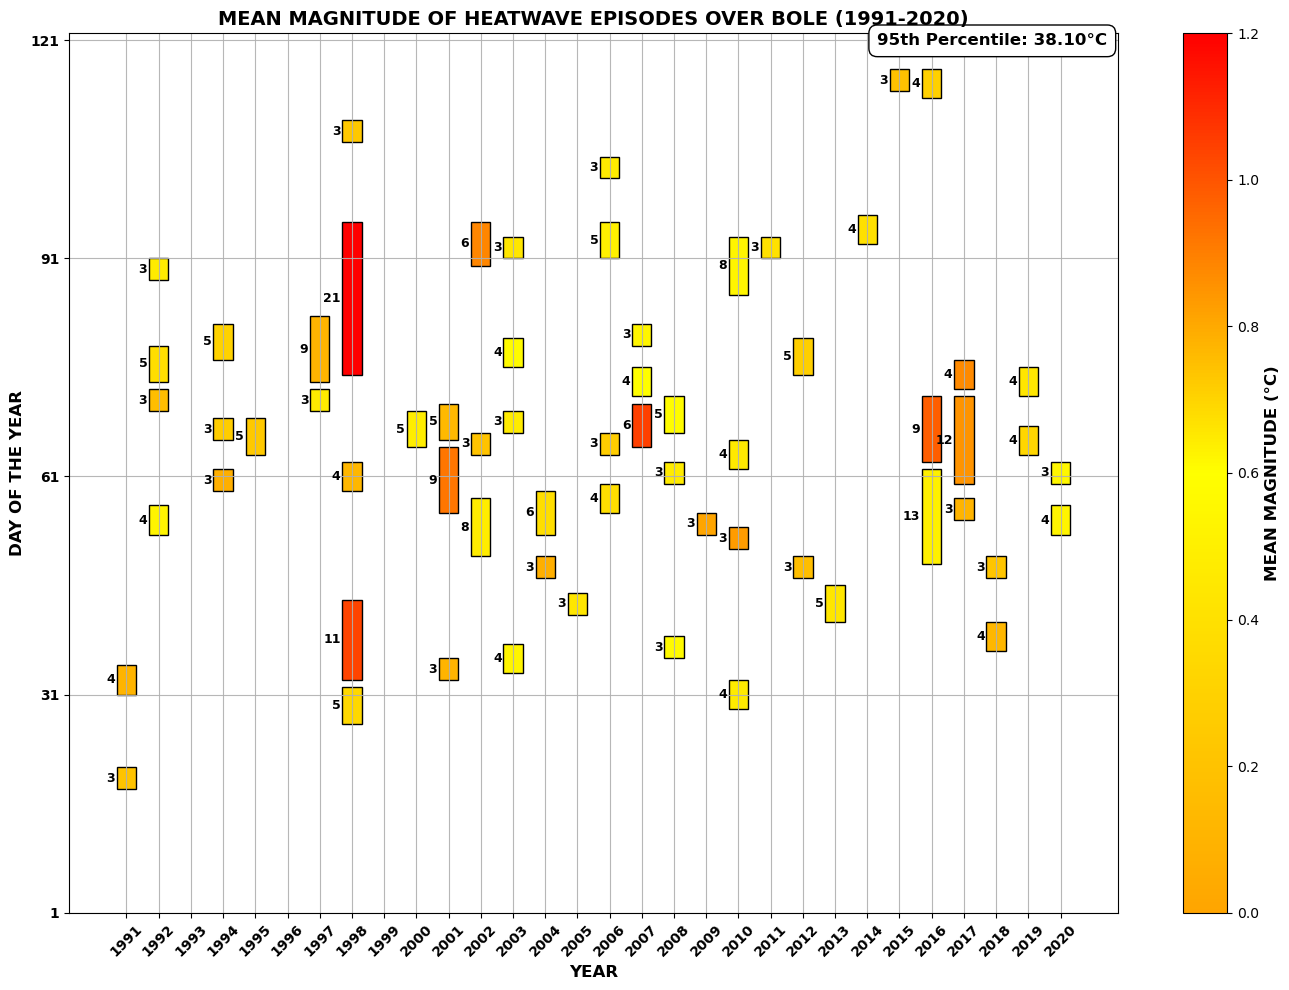

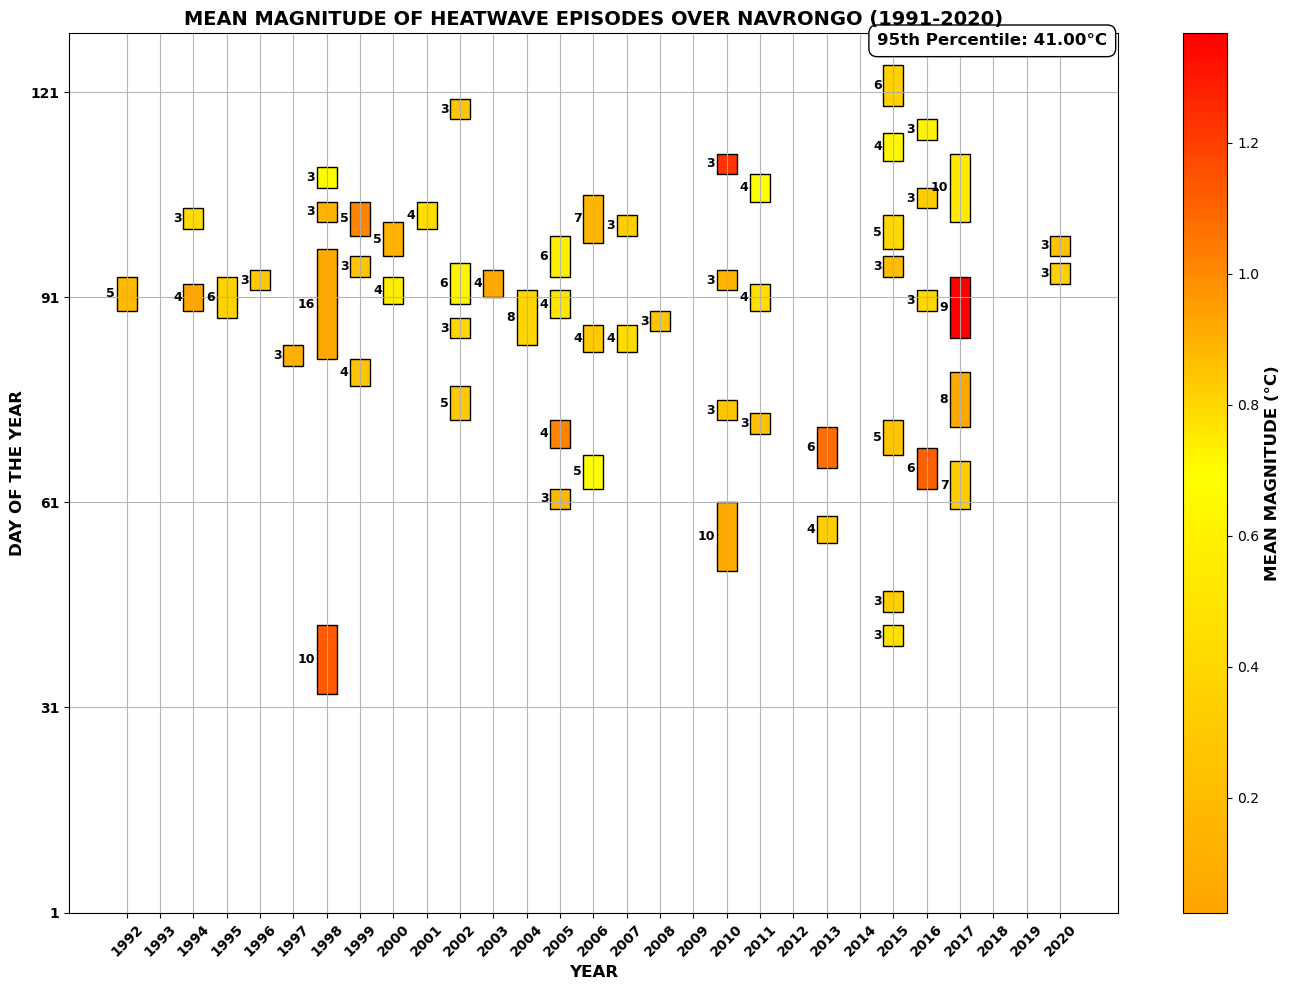

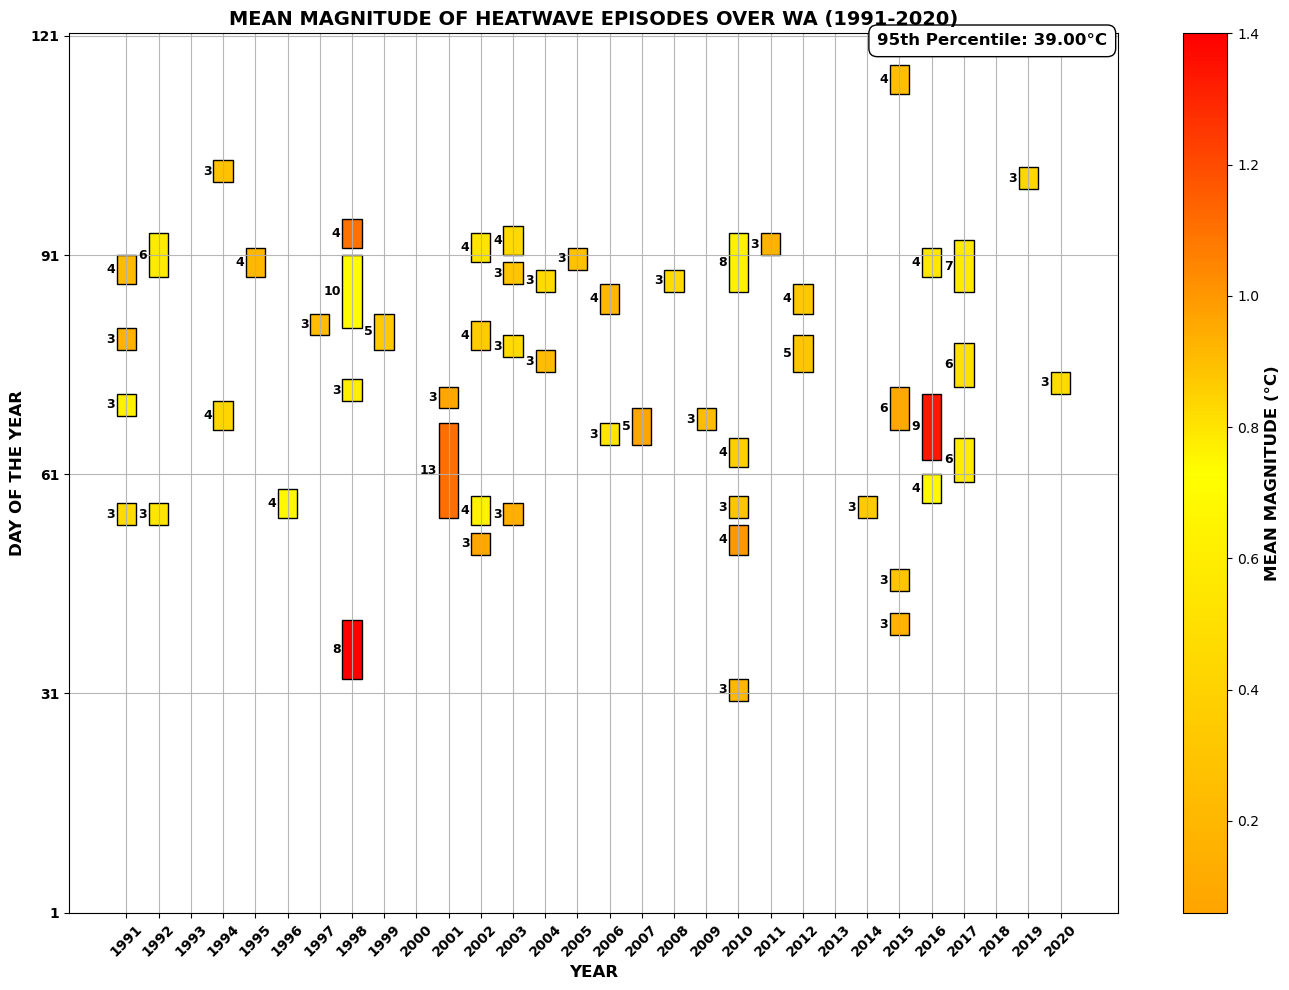

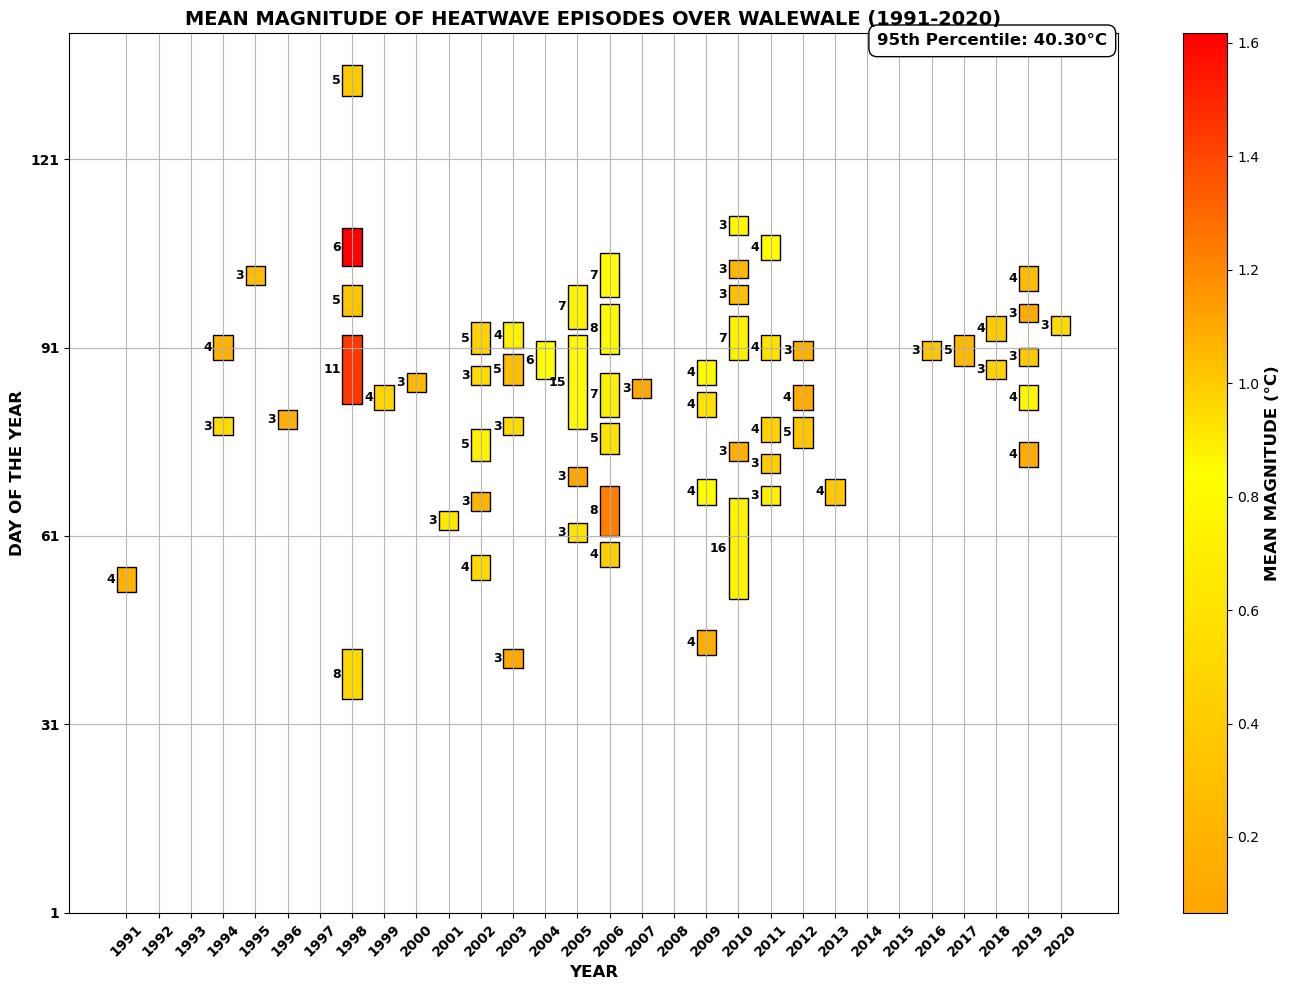

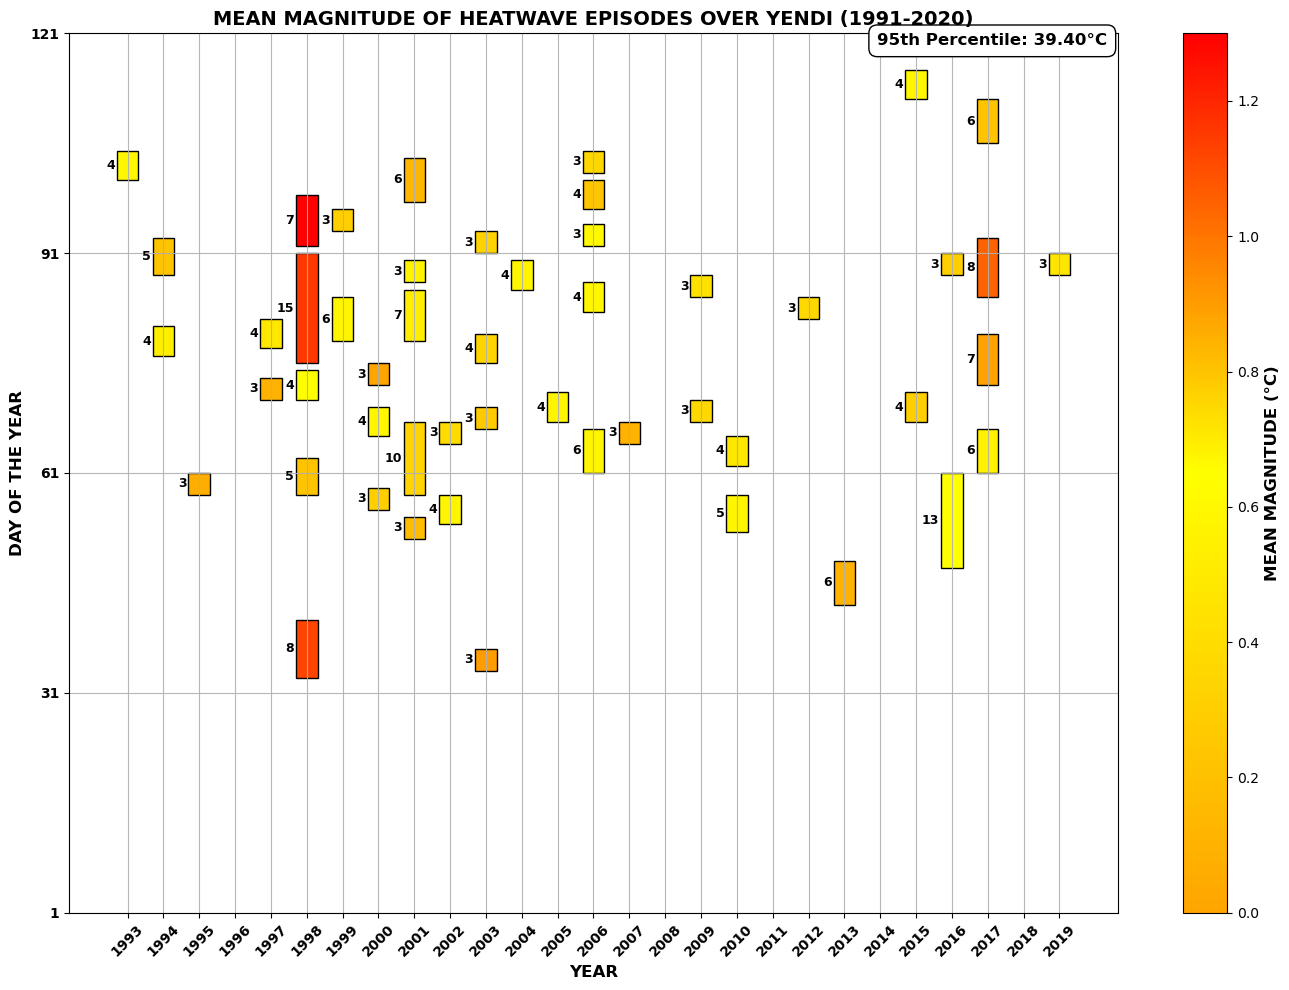

In [29]:
# Loading the data for each location
locations = ['Bole', 'Navrongo', 'Wa', 'Walewale', 'Yendi']

# Storing all locations data in a dictionary for easier processing
data = {
    'Bole': Bole,
    'Navrongo': Navrongo,
    'Wa': Wa,
    'Walewale': Walewale,
    'Yendi': Yendi
}

percentiles = {
    'Bole': Bole_95th_percentile,
    'Navrongo': Navrongo_95th_percentile,
    'Wa': Wa_95th_percentile,
    'Walewale': Walewale_95th_percentile,
    'Yendi': Yendi_95th_percentile
}

# Filtering days that exceeded the 95th percentile
for location, df in data.items():
    df['above_95th'] = df['max_temperature'] > percentiles[location]

# Defining the function to find consecutive days above the 95th percentile and extract episodes
def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
    df = df.dropna(subset=['date'])  # Dropping rows where date parsing failed)

    df['consecutive'] = df['above_95th'].astype(int).groupby((df['above_95th'] != df['above_95th'].shift()).cumsum()).cumsum()
    df['episode_id'] = (df['above_95th'] & (df['consecutive'] == 1)).cumsum()

    # Identifying the start and end of each episode
    episode_starts = df[df['consecutive'] == 1].reset_index()
    episode_ends = df[df['consecutive'] == df['consecutive'].groupby(df['episode_id']).transform('max')].reset_index()

    # Merging start and end dates
    episodes = pd.merge(episode_starts, episode_ends, on='episode_id', suffixes=('_start', '_end'))
    episodes = episodes[episodes['consecutive_end'] >= 3]

    return episodes[['date_start', 'date_end', 'max_temperature_start', 'max_temperature_end', 'episode_id']]

# Getting the episodes for each location
episodes = {location: filter_consecutive_days(df) for location, df in data.items()}

# Defining the function to calculate the mean magnitude for each episode
def calculate_episode_magnitude(df, original_df):
    magnitudes = []
    for _, episode in df.iterrows():
        episode_df = original_df[(original_df['date'] >= episode['date_start']) & (original_df['date'] <= episode['date_end'])]
        daily_magnitudes = episode_df['max_temperature'] - episode_df['max_temperature'].min()
        mean_magnitude = daily_magnitudes.mean()
        magnitudes.append(mean_magnitude)
    df['mean_magnitude'] = magnitudes
    return df

# Calculating the mean magnitude for each episode
for location in locations:
    episodes[location] = calculate_episode_magnitude(episodes[location], data[location])

# Creating colormap 
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["orange", "yellow", "red"])

# Defining the plotting function for heat wave episodes with vertical bars and dates on the y-axis
def plot_heat_wave_episodes(episodes_df, location_name, percentile):
    # Initializing lists to store episode data
    episodes = []

    # Flattening the start and end dates into a single list of dictionaries
    for _, episode in episodes_df.iterrows():
        episodes.append({
            'date_start': episode['date_start'],
            'date_end': episode['date_end'],
            'mean_magnitude': episode['mean_magnitude'],
            'duration': (episode['date_end'] - episode['date_start']).days + 1
        })

    # Creating DataFrame from episodes list
    episodes_df = pd.DataFrame(episodes)

    # Sorting the episodes by the start date to ensure chronological order
    episodes_df = episodes_df.sort_values(by='date_start')

    # Creating a normalized colormap based on the mean magnitude
    norm = Normalize(vmin=episodes_df['mean_magnitude'].min(), vmax=episodes_df['mean_magnitude'].max())

    # Plotting the data as bars from start date to end date
    fig, ax = plt.subplots(figsize=(14, 10))

    for idx, episode in episodes_df.iterrows():
        color = cmap(norm(episode['mean_magnitude']))

        # Determining the y-position for the episode
        y_pos = episode['date_start'].timetuple().tm_yday

        # Plotting the episode bar
        ax.bar(episode['date_start'].year, episode['duration'], bottom=y_pos, color=color, width=0.6, edgecolor='black')

        # Annotating the number of days on the plot
        ax.text(episode['date_start'].year-0.35, y_pos + episode['duration'] / 2, f'{episode["duration"]}', ha='right', va='center', color='black', fontsize=9,fontweight='bold')

    # Annotating the percentile value on the plot
    ax.annotate(f'95th Percentile: {percentile:.2f}°C', xy=(0.99, 1), xycoords='axes fraction', fontsize=12, fontweight='bold', ha='right', va='top',
                bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

    # Setting the x-axis to display the years in order
    ax.set_xticks(np.arange(episodes_df['date_start'].dt.year.min(), episodes_df['date_start'].dt.year.max() + 1))
    ax.set_xticklabels(np.arange(episodes_df['date_start'].dt.year.min(), episodes_df['date_start'].dt.year.max() + 1), rotation=45, fontweight='bold')

    # Setting the y-axis to display the day of the year
    ax.set_yticks(np.arange(0, 121, 30))
    ax.set_yticklabels([f'{i}' for i in range(1, 122, 30)], fontweight='bold')

    ax.set_xlabel('YEAR', fontweight='bold', fontsize=12)
    ax.set_ylabel('DAY OF THE YEAR', fontweight='bold', fontsize=12)
    ax.set_title(f'MEAN MAGNITUDE OF HEATWAVE EPISODES OVER {location_name.upper()} (1991-2020)', fontweight='bold',color='black', fontsize=14)

    # Creating a ScalarMappable for the Colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 

    # Adding Colorbar
    cbar = fig.colorbar(sm, ax=ax, label='MEAN MAGNITUDE (°C)')
    cbar.set_label('MEAN MAGNITUDE (°C)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.9)
    plt.tight_layout()

    # Saving plots
    plt.savefig(f'Historical_magnitude{location_name}.png')
    plt.show()

plot_heat_wave_episodes(episodes['Bole'], 'Bole', percentiles['Bole'])
plot_heat_wave_episodes(episodes['Navrongo'], 'Navrongo', percentiles['Navrongo'])
plot_heat_wave_episodes(episodes['Wa'], 'Wa', percentiles['Wa'])
plot_heat_wave_episodes(episodes['Walewale'], 'Walewale', percentiles['Walewale'])
plot_heat_wave_episodes(episodes['Yendi'], 'Yendi', percentiles['Yendi'])

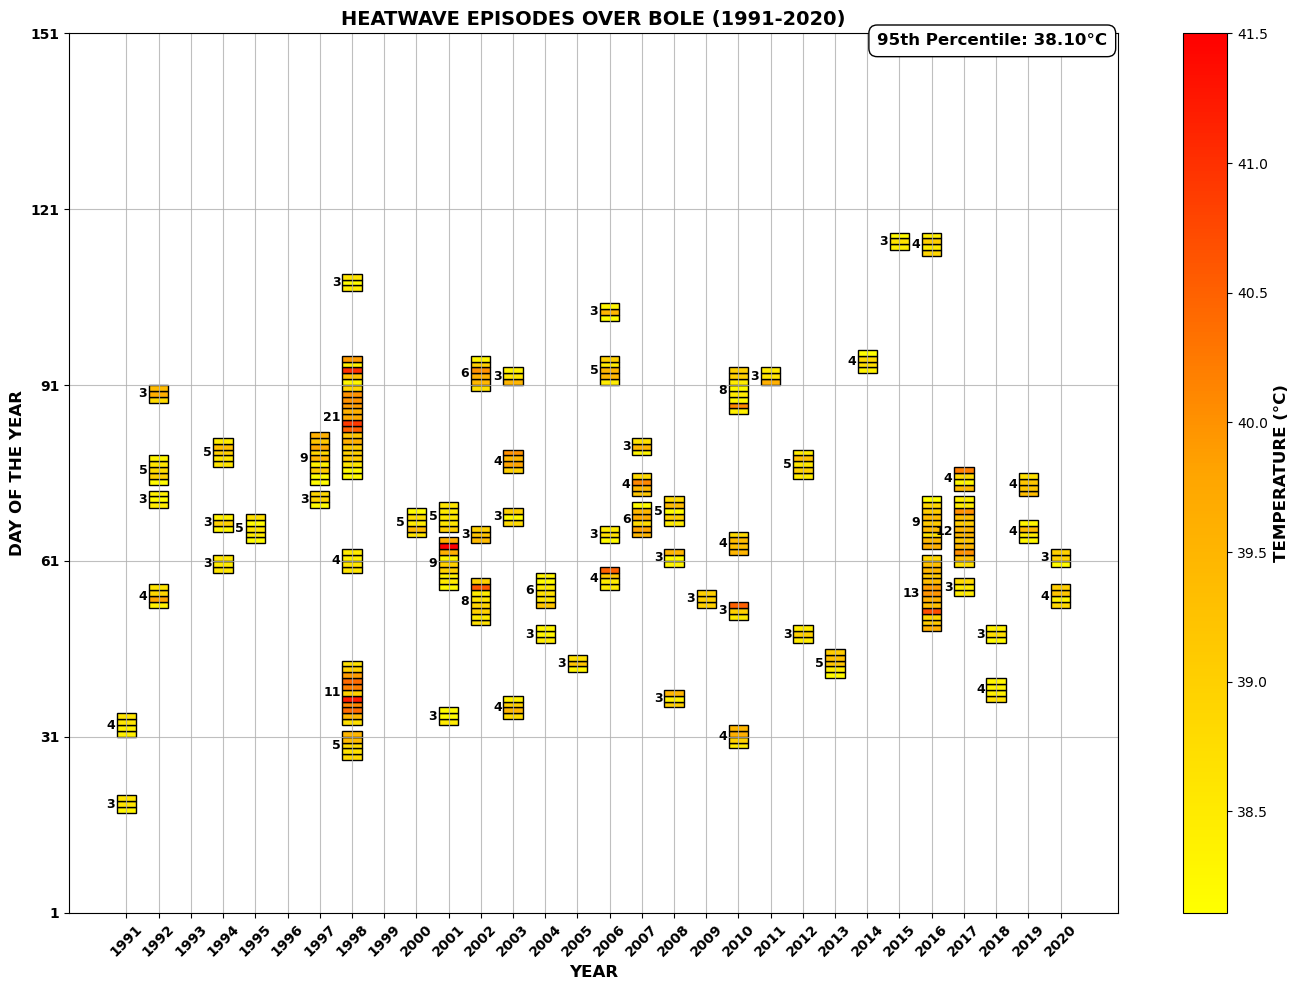

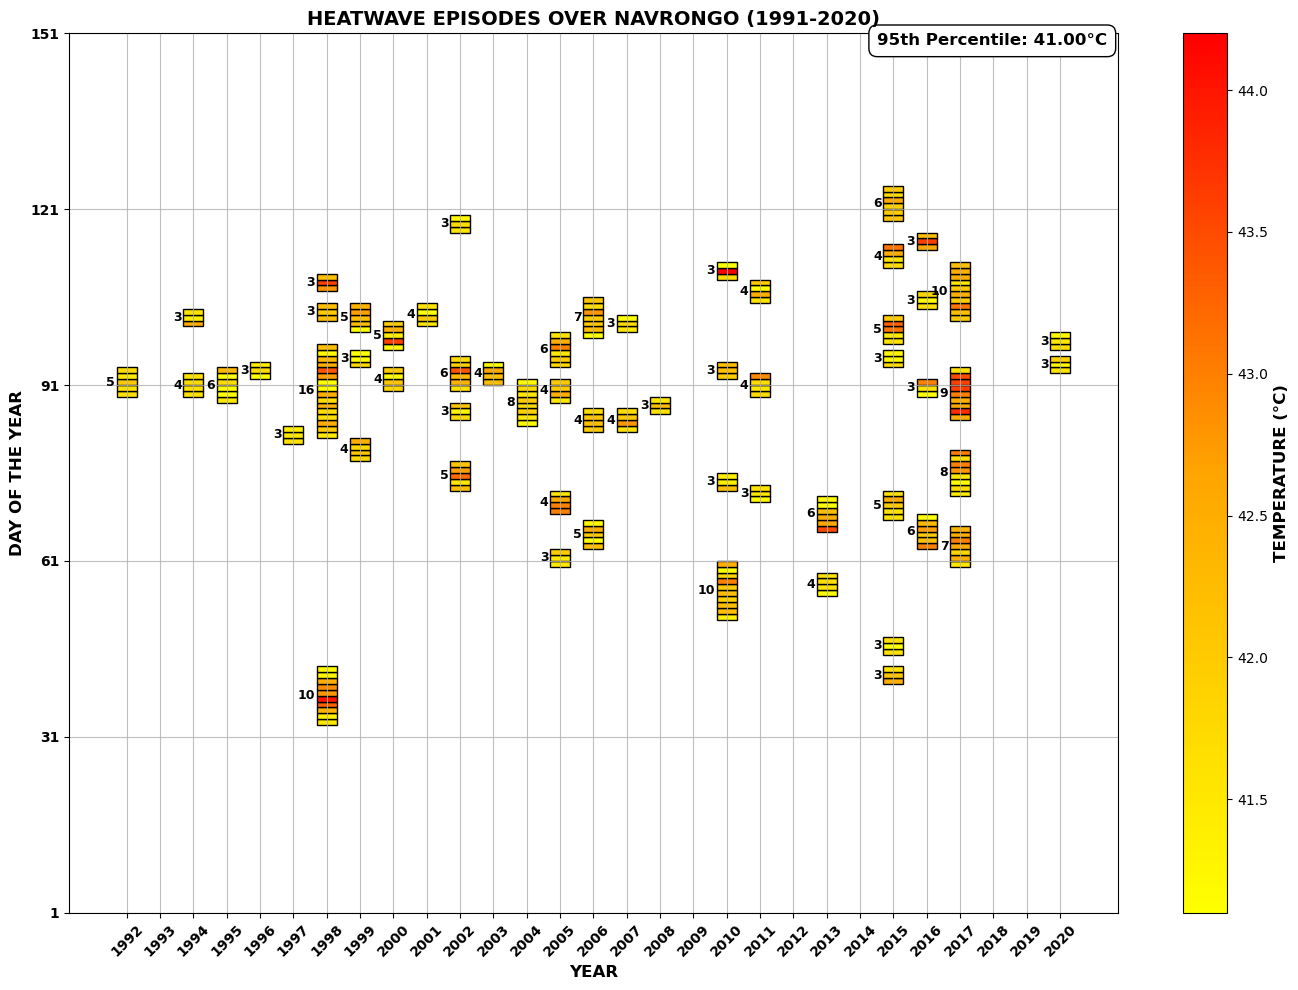

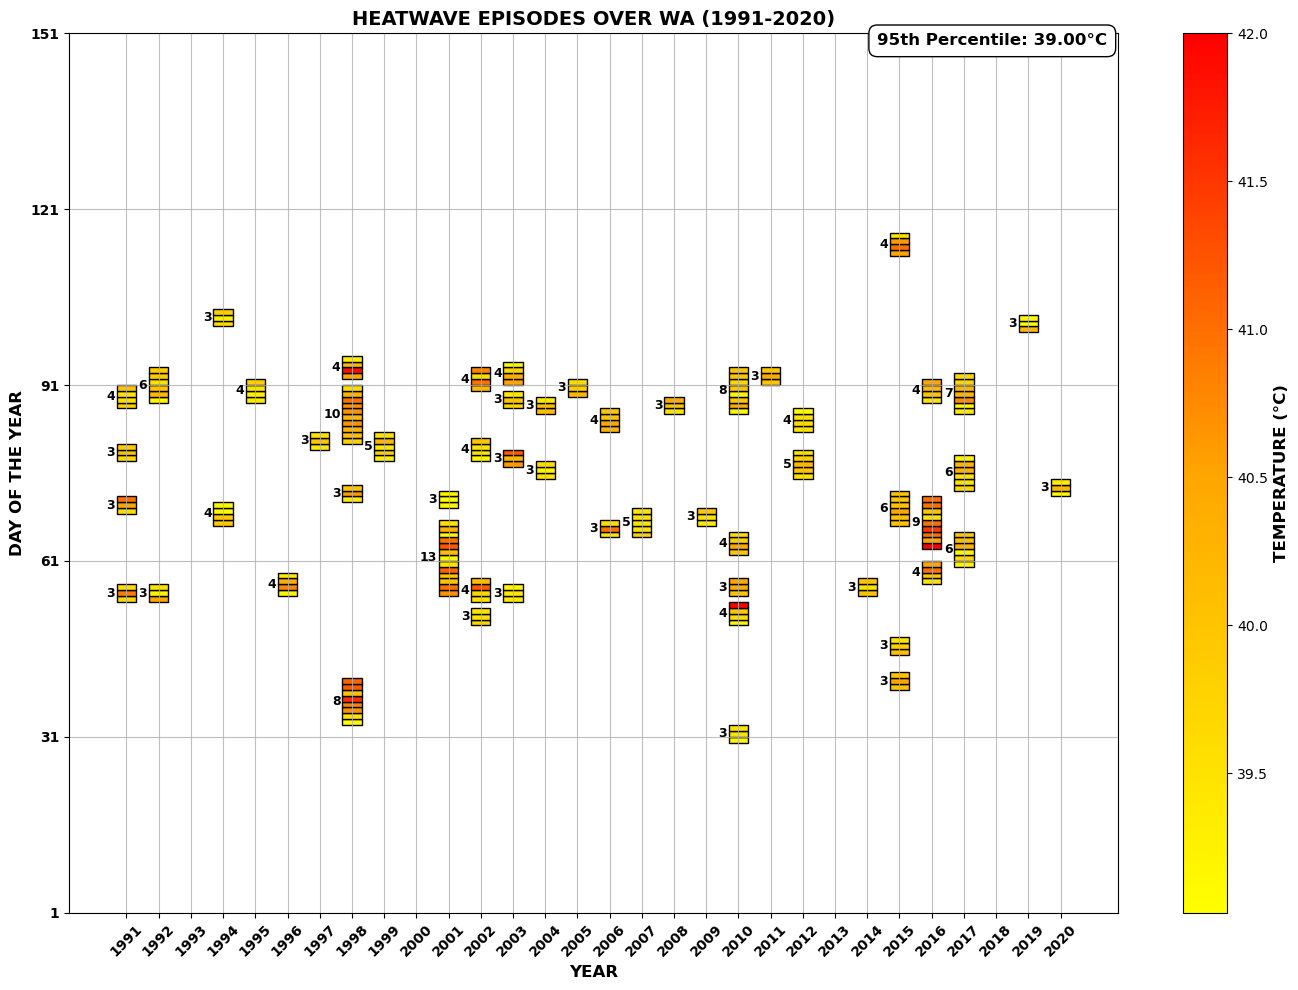

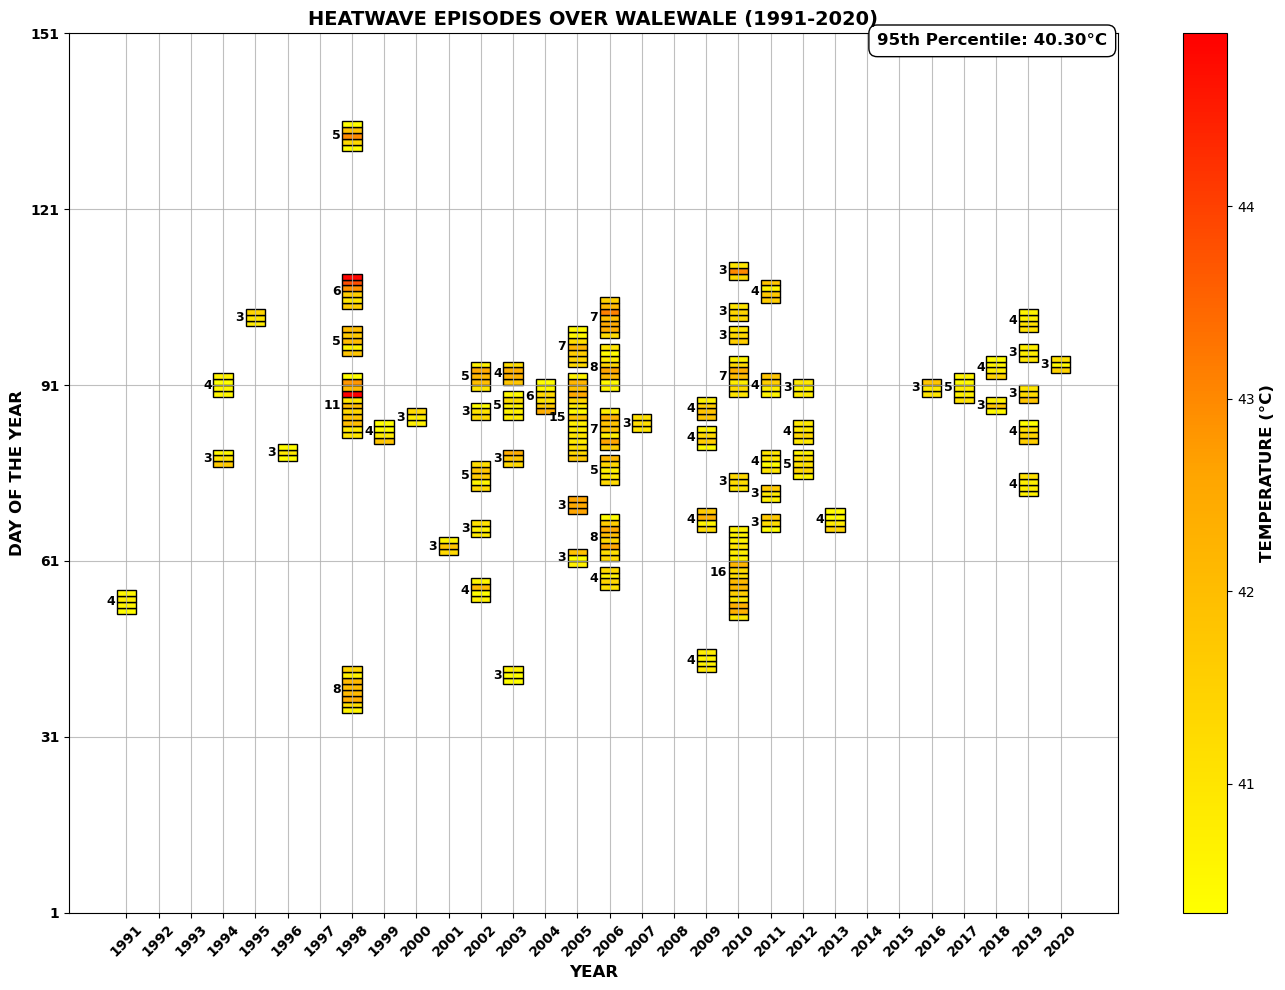

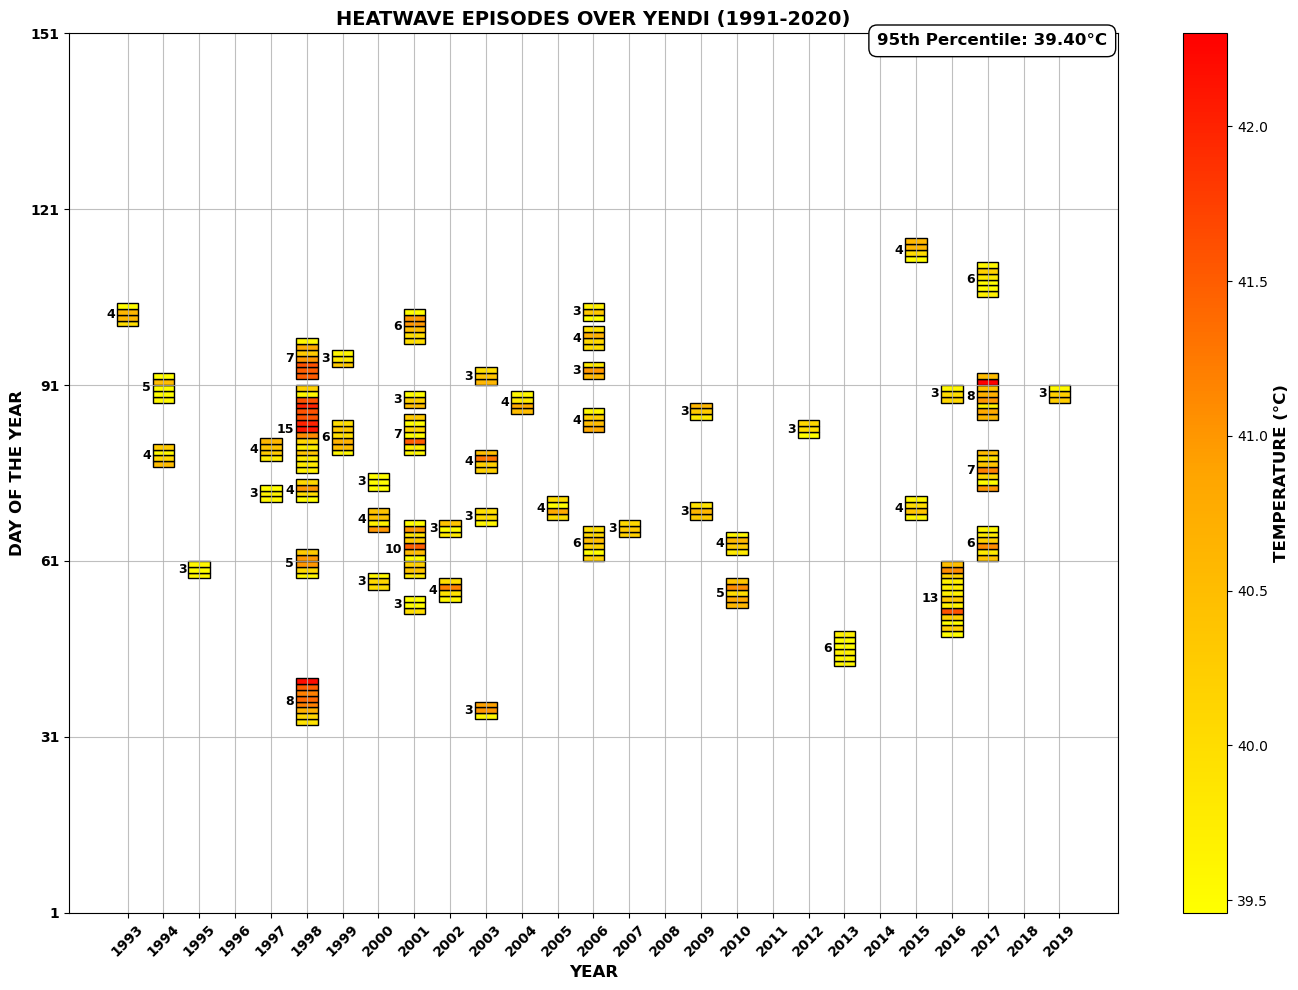

In [30]:
# Creating colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "orange", "red"])

# Defining the plotting function for heat wave episodes with vertical bars and dates on the y-axis
def plot_heat_wave_episodes(episodes_df, location_name, percentile, original_loc):
    # Flattening the start and end dates into a single list of dictionaries
    episodes = [
        {
            'date_start': episode['date_start'],
            'date_end': episode['date_end'],
            'duration': (episode['date_end'] - episode['date_start']).days + 1,
            'temperatures': original_loc[(original_loc['date'] >= episode['date_start']) & (original_loc['date'] <= episode['date_end'])]['max_temperature'].values
        }
        for _, episode in episodes_df.iterrows()
    ]

    # Creating DataFrame from episodes list
    episodes_df = pd.DataFrame(episodes)

    # Sorting the episodes by the start date to ensure chronological order
    episodes_df = episodes_df.sort_values(by='date_start')

    # Flattening all temperatures to find the overall min and max
    all_temperatures = np.concatenate(episodes_df['temperatures'].values)
    vmin = all_temperatures.min()
    vmax = all_temperatures.max()

    # Creating a normalized colormap based on the temperature values
    norm = Normalize(vmin=vmin, vmax=vmax)

    # Plotting the data as bars from start date to end date
    fig, ax = plt.subplots(figsize=(14, 10))

    for idx, episode in episodes_df.iterrows():
        for i, temp in enumerate(episode['temperatures']):
            color = cmap(norm(temp))
            y_pos = (episode['date_start'] + pd.Timedelta(days=i)).timetuple().tm_yday
            ax.bar(episode['date_start'].year, 1, bottom=y_pos, color=color, width=0.6, edgecolor='black')
        
        # Annotate duration in the middle of the bar
        y_mid_pos = episode['date_start'].timetuple().tm_yday + episode['duration'] / 2
        ax.text(episode['date_start'].year-0.35, y_mid_pos, f'{episode["duration"]}', ha='right', va='center', color='black', fontsize=9, fontweight='bold')

    ax.annotate(f'95th Percentile: {percentile:.2f}°C', xy=(0.99, 1), xycoords='axes fraction', fontsize=12, fontweight='bold', ha='right', va='top',
                bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
    ax.set_xticks(np.arange(episodes_df['date_start'].dt.year.min(), episodes_df['date_start'].dt.year.max() + 1))
    ax.set_xticklabels(np.arange(episodes_df['date_start'].dt.year.min(), episodes_df['date_start'].dt.year.max() + 1), rotation=45,fontweight='bold')
    ax.set_yticks(np.arange(0, 151, 30))
    ax.set_yticklabels([f'{i}' for i in range(1, 152, 30)], fontweight='bold')
    ax.set_xlabel('YEAR', fontweight='bold', fontsize=12)
    ax.set_ylabel('DAY OF THE YEAR', fontweight='bold', fontsize=12)
    ax.set_title(f'HEATWAVE EPISODES OVER {location_name.upper()} (1991-2020)', fontweight='bold', fontsize=14)
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label='TEMPERATURE (°C)')
    cbar.set_label('TEMPERATURE (°C)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.8)
    plt.tight_layout()
    plt.savefig(f'HISTORICAL_INTENSITY_{location_name}.png')
    plt.show()

# Plotting for each location
for location_name, original_df in data.items():
    plot_heat_wave_episodes(episodes[location_name], location_name, percentiles[location_name], original_df)


# finding total number of episodes

In [16]:

# Defining the function to find consecutive days above the 95th percentile and extract episodes
def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
    df = df.dropna(subset=['date'])  # Dropping rows where date parsing failed

    df['consecutive'] = df['above_95th'].astype(int).groupby((df['above_95th'] != df['above_95th'].shift()).cumsum()).cumsum()
    df['episode_id'] = (df['above_95th'] & (df['consecutive'] == 1)).cumsum()

    # Identifying the start and end of each episode
    episode_starts = df[df['consecutive'] == 1].reset_index()
    episode_ends = df[df['consecutive'] == df['consecutive'].groupby(df['episode_id']).transform('max')].reset_index()

    # Merging start and end dates
    episodes = pd.merge(episode_starts, episode_ends, on='episode_id', suffixes=('_start', '_end'))
    episodes = episodes[episodes['consecutive_end'] >= 3]

    # Adding year to the episodes DataFrame
    episodes['year'] = episodes['date_start'].dt.year

    # Counting the number of episodes annually
    annual_episodes = episodes.groupby('year').size().reset_index(name='number_of_episodes')

    return annual_episodes

for location, df in data.items():
    annual_episodes = filter_consecutive_days(df)
    print(f"Annual number of episodes for {location}:")
    print(annual_episodes)

Annual number of episodes for Bole:
    year  number_of_episodes
0   1991                   2
1   1992                   4
2   1994                   3
3   1995                   1
4   1997                   2
5   1998                   5
6   2000                   1
7   2001                   3
8   2002                   3
9   2003                   4
10  2004                   2
11  2005                   1
12  2006                   4
13  2007                   3
14  2008                   3
15  2009                   1
16  2010                   4
17  2011                   1
18  2012                   2
19  2013                   1
20  2014                   1
21  2015                   1
22  2016                   3
23  2017                   3
24  2018                   2
25  2019                   2
26  2020                   2
Annual number of episodes for Navrongo:
    year  number_of_episodes
0   1992                   1
1   1994                   2
2   1995                 

In [17]:
# Filtering days that exceeded the 95th percentile
for location, df in data.items():
    df['above_95th'] = df['max_temperature'] > percentiles[location]

# Defining the function to find consecutive days above the 95th percentile and extract episodes
def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
    df = df.dropna(subset=['date'])  # Dropping rows where date parsing failed

    df['consecutive'] = df['above_95th'].astype(int).groupby((df['above_95th'] != df['above_95th'].shift()).cumsum()).cumsum()
    df['episode_id'] = (df['above_95th'] & (df['consecutive'] == 1)).cumsum()

    # Identifying the start and end of each episode
    episode_starts = df[df['consecutive'] == 1].reset_index()
    episode_ends = df[df['consecutive'] == df['consecutive'].groupby(df['episode_id']).transform('max')].reset_index()

    # Merging start and end dates
    episodes = pd.merge(episode_starts, episode_ends, on='episode_id', suffixes=('_start', '_end'))
    episodes = episodes[episodes['consecutive_end'] >= 3]

    # Counting the number of episodes
    episode_count = len(episodes['episode_id'].unique())
    episodes['number_of_episodes'] = episode_count
    

    return episodes[['date_start', 'date_end', 'max_temperature_start', 'max_temperature_end', 'episode_id', 'number_of_episodes']]

# Example usage
for location, df in data.items():
    episodes = filter_consecutive_days(df)
    print(f"Number of episodes for {location}: {episodes['number_of_episodes'].iloc[0]}")


Number of episodes for Bole: 64
Number of episodes for Navrongo: 58
Number of episodes for Wa: 55
Number of episodes for Walewale: 63
Number of episodes for Yendi: 50


In [18]:
# Filtering days that exceeded the 95th percentile
for location, df in data.items():
    df['above_95th'] = df['max_temperature'] > percentiles[location]

# Defining the function to find consecutive days above the 95th percentile and extract episodes
def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
    df = df.dropna(subset=['date'])  # Dropping rows where date parsing failed

    df['consecutive'] = df['above_95th'].astype(int).groupby((df['above_95th'] != df['above_95th'].shift()).cumsum()).cumsum()
    df['episode_id'] = (df['above_95th'] & (df['consecutive'] == 1)).cumsum()

    # Identifying the start and end of each episode
    episode_starts = df[df['consecutive'] == 1].reset_index()
    episode_ends = df[df['consecutive'] == df['consecutive'].groupby(df['episode_id']).transform('max')].reset_index()

    # Merging start and end dates
    episodes = pd.merge(episode_starts, episode_ends, on='episode_id', suffixes=('_start', '_end'))
    episodes = episodes[episodes['consecutive_end'] >= 3]

    # Counting the number of episodes
    episode_count = len(episodes['episode_id'].unique())
    episodes['number_of_episodes'] = episode_count
    
    return episodes[['date_start', 'date_end', 'max_temperature_start', 'max_temperature_end', 'episode_id', 'number_of_episodes']]

# Calculate and print the mean number of episodes for each location
for location, df in data.items():
    episodes = filter_consecutive_days(df)
    total_episodes = len(episodes)  # Total number of episodes
    num_years = df['Year'].nunique()  # Number of years in the dataset
    mean_episodes = total_episodes / num_years  # Mean number of episodes per year
    print(f"Mean number of episodes for {location}: {mean_episodes:.2f}")


Mean number of episodes for Bole: 2.13
Mean number of episodes for Navrongo: 1.93
Mean number of episodes for Wa: 1.83
Mean number of episodes for Walewale: 2.10
Mean number of episodes for Yendi: 1.67


In [19]:
# Filtering days that exceeded the 95th percentile
for location, df in data.items():
    df['above_95th'] = df['max_temperature'] > percentiles[location]

# Defining the function to find consecutive days above the 95th percentile and extract episodes
def filter_consecutive_days(df):
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
    df = df.dropna(subset=['date'])  # Dropping rows where date parsing failed

    # Identify consecutive days and episode ids
    df['consecutive'] = (df['above_95th'] != df['above_95th'].shift()).cumsum()
    df['episode_id'] = df.groupby('consecutive').ngroup() + 1

    # Identifying the start and end of each episode
    episode_starts = df[df['above_95th'] & (df['above_95th'].shift() == False)].reset_index()
    episode_ends = df[df['above_95th'] & (df['above_95th'].shift(-1) == False)].reset_index()

    # Merging start and end dates
    episodes = pd.merge(episode_starts, episode_ends, on='episode_id', suffixes=('_start', '_end'))
    episodes['duration'] = (episodes['date_end'] - episodes['date_start']).dt.days + 1
    episodes = episodes[episodes['duration'] >= 3]  # Filter for episodes with at least 3 days

    return episodes[['date_start', 'date_end', 'max_temperature_start', 'max_temperature_end', 'episode_id', 'duration']]

# Calculate and print the mean number of consecutive days per year for each location
mean_consecutive_days_per_year = {}
for location, df in data.items():
    episodes = filter_consecutive_days(df)
    total_consecutive_days = episodes['duration'].sum()  # Total number of consecutive days
    num_years = df['Year'].nunique()  # Number of years in the dataset
    mean_consecutive_days = total_consecutive_days / num_years  # Mean number of consecutive days per year
    mean_consecutive_days_per_year[location] = mean_consecutive_days
    print(f"Mean number of consecutive days per year for {location}: {mean_consecutive_days:.2f}")

# Calculate and print the overall mean number of consecutive days per year across all locations
overall_mean_consecutive_days = sum(mean_consecutive_days_per_year.values()) / len(mean_consecutive_days_per_year) if mean_consecutive_days_per_year else 0
print(f"Overall mean number of consecutive days per year across all locations: {overall_mean_consecutive_days:.2f}")


Mean number of consecutive days per year for Bole: 10.33
Mean number of consecutive days per year for Navrongo: 9.23
Mean number of consecutive days per year for Wa: 7.87
Mean number of consecutive days per year for Walewale: 9.80
Mean number of consecutive days per year for Yendi: 7.97
Overall mean number of consecutive days per year across all locations: 9.04
